<H1> Group 22: Project title <H1>

<H3>Introduction</H3><br>
<p>Forest fires have been increasing in numbers in the past decades due to human activity. These fires are clear indicators that our actions call for change because not only do they displace the habitants of said forests and endagere lives but also pollute the air we breathe. In this project, we intend to use the data available to us through meterological observations mentioned in the Forest Fire Weather Index to determine **_insert question_**.<br></p>


(EDIT THAT)For this project, we make use of the Algerian Forest Fire Data Set which has 244 observations of 13 attributes and 1 output attribute, which in this case tells us whether there was a fire or not. <br>
<H4> Data set used: </H4>
Algerian forest fires: https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv <br>
This data set has 14 variables, thirteen of which are numerical and one is categorical.

<H2> Loading the data set into R and wrangling it </H2>

In [104]:
# install.packages("skimr")
library(tidyverse)
library(tidymodels)
library(skimr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [105]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


<H3> After a quick examination we can see that:</H3>
    <li> File that we read contains 2 dataframes.</li>
    <li> The collumn types of the data set are not parsed correctly.</li>
    <li> We know that there is something causing parsing issues in the rows : 123 and 168.</li> 
<p> To extract the target data frame, we would need to split the file into 2 dataframes that it contains, tidy each dataframe and join them </p>

<H4>Extracting and tidying Bejaja region data set</H4>

In [106]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.numeric) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
# head(bejaja_forest_tidy)

<H4>Extracting and tidying Sidi-Bel region data set</H4>

In [107]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the bejaja data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)

#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(as.numeric)  

# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”
Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”


<H4>Joining our two new dataframes</H4> 

In [198]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
# algerian_forest_fires_tidy
# The resulting data frame is tidy and ready for the further analysis

Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [183]:
set.seed(2000)
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
forest_split <- initial_split(algerian_forest_fires_tidy, prop = 0.75, strata = Classes)
forest_train <- training(forest_split)
forest_test <- testing(forest_split)

my_skim <- skim_with(numeric = sfl(median = ~ median(., na.rm = TRUE), mean = ~ mean(., na.rm = TRUE),
                                   min = ~ min(., na.rm = TRUE), max = ~ max(., na.rm = TRUE)),
                                   append = FALSE)

summary_df <- my_skim(forest_train) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.max)
summary_df

skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.median,numeric.mean,numeric.min,numeric.max
<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Classes,1,0.9945355,FALSE,2,"fir: 103, not: 79",NA,NA,NA,NA
day,0,1.0000000,NA,NA,NA,16.0,16.0273224,1.0,31.0
month,0,1.0000000,NA,NA,NA,8.0,7.5519126,6.0,9.0
year,0,1.0000000,NA,NA,NA,2012.0,2012.0000000,2012.0,2012.0
Temperature,0,1.0000000,NA,NA,NA,32.0,32.1147541,24.0,40.0
RH,0,1.0000000,NA,NA,NA,63.0,62.7868852,26.0,90.0
Ws,0,1.0000000,NA,NA,NA,15.0,15.5245902,6.0,29.0
Rain,0,1.0000000,NA,NA,NA,0.0,0.6595628,0.0,16.8
FFMC,0,1.0000000,NA,NA,NA,83.7,77.6688525,28.6,94.3


Warning message:
“Removed 1 rows containing missing values (geom_point).”


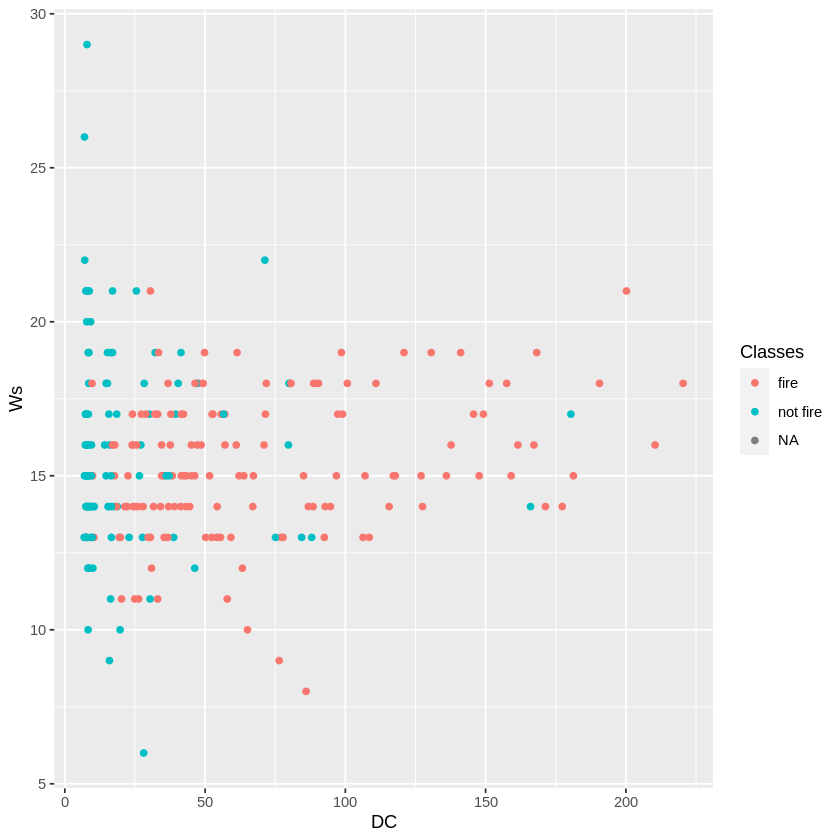

In [155]:
algerian_forest_plot <- algerian_forest_fires_tidy %>% 
    ggplot(aes(x = DC, y = Ws, color = Classes)) +
        geom_point()
algerian_forest_plot

**Expected outcomes and significance:**<br>
Through this project, we expect to find whether the following predictors **insert predictors** can help us determine **insert question** (elaborate more on that)<br>
As we, humans, fail to take actions against what causes these forest fires to happen so frequently, we need indicators which can help assist authorities in tackling this man-made disaster. Not only will these help firefighters understand whether there is a possibility of a forest fire passing onto a different region (given region's predictors) but also help scientists determine regions prone to fires.<br>
One important question after proecessing the entire data above would be whether there are more factors we can consider which can help understand nature of fires better or do we go on building better models with the given predictors.
